<a href="https://colab.research.google.com/github/sanjanagarai/Stock_Price_Prediction/blob/main/Monte_Carlo_Stock_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [ ]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np

In [ ]:
!pip install yfinance

## Loading data from Yahoo finance

In [ ]:
yf.pdr_override()

#import data
def get_data(stocks, start, end):
  stockData=pdr.get_data_yahoo(stocks, start, end)
  stockData = stockData['Close']
  returns = stockData.pct_change()
  meanReturns = returns.mean()
  covmatrix = returns.cov()
  return meanReturns,covmatrix

stockList = ['CBA', 'BHP', 'NAB', 'WBC', 'STO']
stocks = [stock + '.AX' for stock in stockList]
endDate =dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stocks, startDate, endDate)
print(meanReturns)

[*********************100%%**********************]  5 of 5 completed
BHP.AX   -0.000142
CBA.AX   -0.000271
NAB.AX   -0.000213
STO.AX    0.000431
WBC.AX   -0.000406
dtype: float64


In [ ]:
print(covMatrix)

          BHP.AX    CBA.AX    NAB.AX    STO.AX    WBC.AX
BHP.AX  0.000210  0.000037  0.000042  0.000084  0.000045
CBA.AX  0.000037  0.000108  0.000095  0.000033  0.000088
NAB.AX  0.000042  0.000095  0.000146  0.000047  0.000106
STO.AX  0.000084  0.000033  0.000047  0.000205  0.000044
WBC.AX  0.000045  0.000088  0.000106  0.000044  0.000121


In [ ]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

print(weights)

[0.31631165 0.26050688 0.26014815 0.14759556 0.01543776]


## Setting up the monte carlo simulation

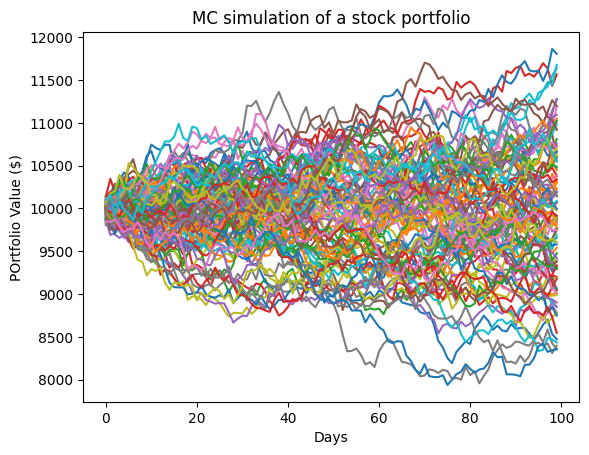

In [ ]:
#Monte Carlo Method

#number of simulations
mc_sims = 100
T = 100 #timeframe in days

meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

intialPortfolio = 10000

for m in range(0, mc_sims):
  #MC loops
  z = np.random.normal(size=(T, len(weights)))
  l = np.linalg.cholesky(covMatrix)
  dailyReturns = meanM + np.inner(l, z)
  portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*intialPortfolio

plt.plot(portfolio_sims)
plt.ylabel("POrtfolio Value ($)")
plt.xlabel("Days")
plt.title("MC simulation of a stock portfolio")
plt.show()
